[*********************100%%**********************]  1 of 1 completed
            Open  High     Low  Close  Adj Close     Volume
Date                                                       
2023-06-01  4.87  5.06  4.7400   4.98       4.98    9049200
2023-06-02  5.13  5.39  5.0300   5.03       5.03   11653000
2023-06-05  5.05  5.45  5.0300   5.39       5.39   12490600
2023-06-06  5.31  5.61  5.1400   5.53       5.53   10577500
2023-06-07  5.64  5.75  5.2800   5.29       5.29   10934300
...          ...   ...     ...    ...        ...        ...
2023-11-27  1.74  1.82  1.6900   1.71       1.71   14409900
2023-11-28  1.69  2.24  1.6300   2.10       2.10   77046900
2023-11-29  1.30  1.41  0.9200   0.97       0.97  187484400
2023-11-30  1.07  1.21  1.0300   1.17       1.17   53457500
2023-12-01  1.23  1.32  1.1404   1.21       1.21   22515379

[128 rows x 6 columns]
            Open  High     Low  Close  Adj Close     Volume        Date
Date                                                   

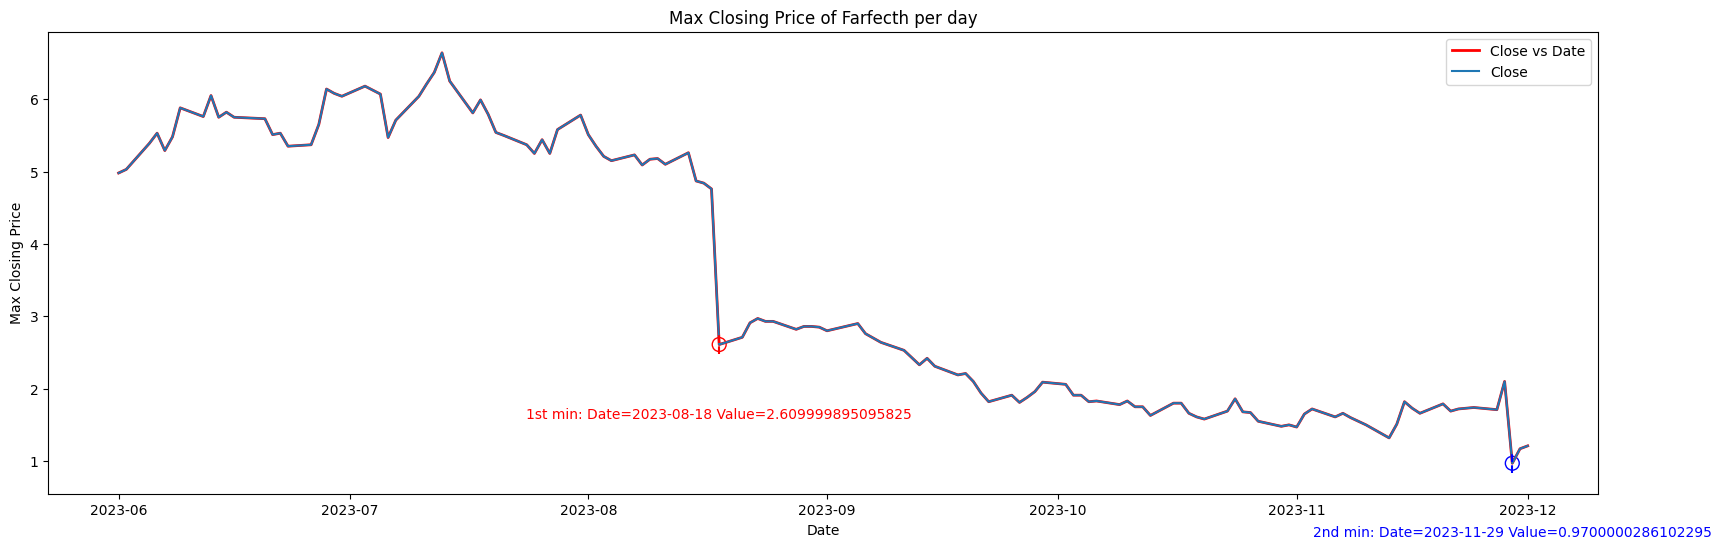

In [46]:
import yfinance as yahooFinance
import pandas as pd
from matplotlib import pyplot as plt 


farfetch_data = yahooFinance.download('FTCH', period='6mo')
print(farfetch_data)
farfetch_data['Date'] = farfetch_data.index.date
print(farfetch_data)
plt.figure(figsize=(20, 6))
plt.plot(farfetch_data['Date'],farfetch_data['Close'], label='Close vs Date', linestyle = 'solid', linewidth = 2, color = 'red' )
first_min_until_2023 = farfetch_data[farfetch_data['Date'] <= pd.to_datetime('2023-09').date()].nsmallest(1, 'Close')




second_min_entire_dataset = farfetch_data.nsmallest(1, 'Close')


plt.plot(farfetch_data['Date'], farfetch_data['Close'], label='Close')

for _, row in first_min_until_2023.iterrows():
    plt.scatter(row['Date'], row['Close'], marker='o', facecolors='none', edgecolors='red', s=100)
    plt.plot([row['Date'], row['Date']], [row['Close'] - 0.02 * max(farfetch_data['Close']), row['Close'] + 0.02 * max(farfetch_data['Close'])], color='red', linestyle='--')
    plt.text(row['Date'], row['Close'] + 0.02 * max(farfetch_data['Close']-50), f'1st min: Date={row["Date"]} Value={row["Close"]}', color='red',ha='center', va='top')

for _, row in second_min_entire_dataset.iterrows():
    plt.scatter(row['Date'], row['Close'], marker='o', facecolors='none', edgecolors='blue', s=100)
    plt.plot([row['Date'], row['Date']], [row['Close'] - 0.02 * max(farfetch_data['Close']  ), row['Close'] + 0.02 * max(farfetch_data['Close'])], color='blue', linestyle='--')
    plt.text(row['Date'], row['Close'] + 0.02 * max(farfetch_data['Close']-50), f'2nd min: Date={row["Date"]} Value={row["Close"]}', color='blue',ha='center', va='top')


plt.xlabel('Date')
plt.ylabel('Max Closing Price')
plt.title('Max Closing Price of Farfecth per day')
plt.legend()
#plt.gca().set_facecolor('navy')
plt.show()





